1. 

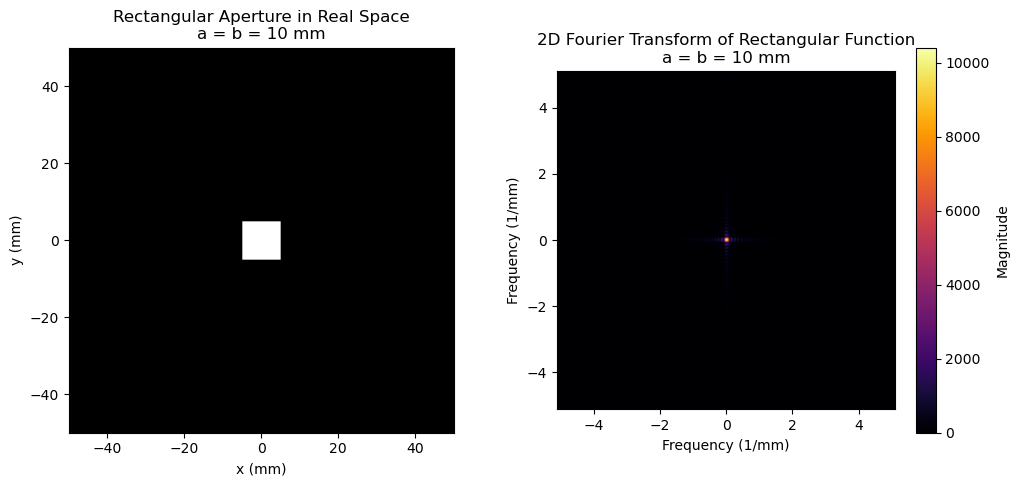

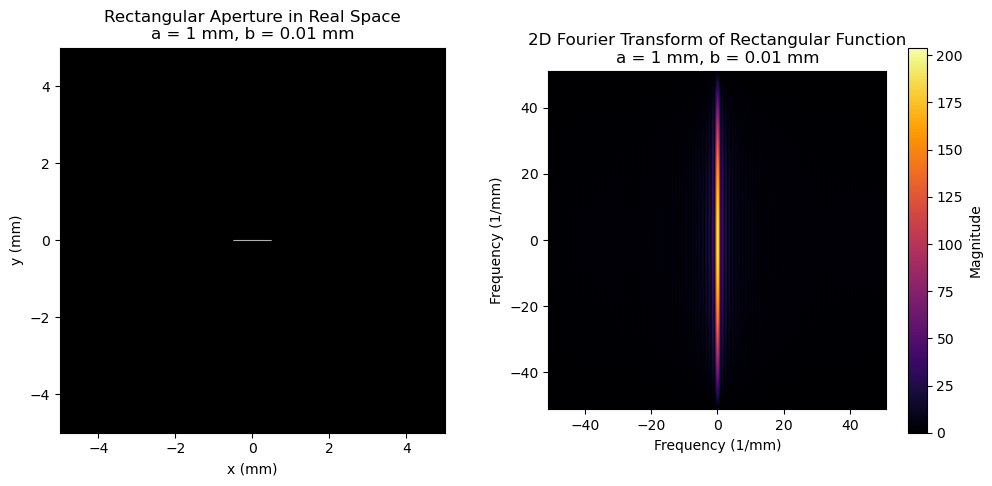

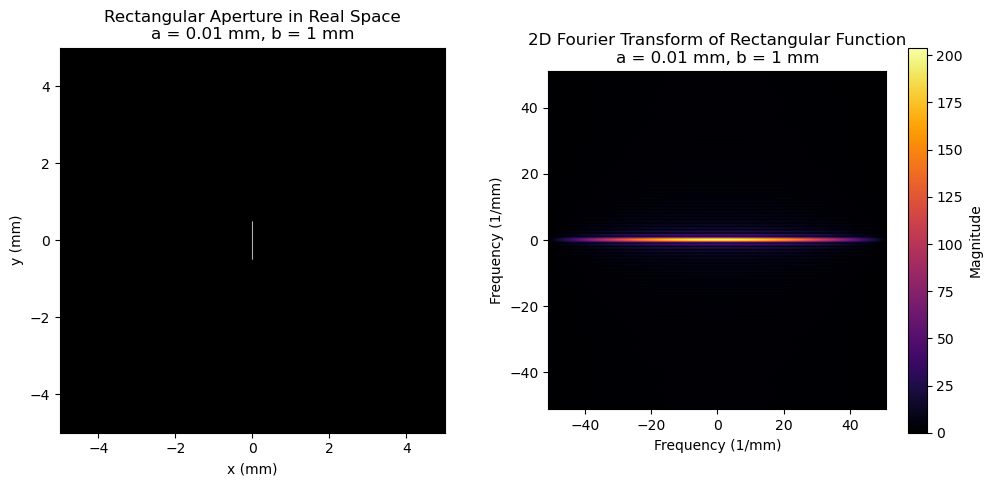

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, fftshift

def rect_2d(x, y, a, b):
    return np.where((np.abs(x) <= a / 2) & (np.abs(y) <= b / 2), 1.0, 0.0)

def fourier_transform_2d(rect):
    return fftshift(fft2(rect))

def plot_real_and_fourier_2d(a, b, title):
    N = 1024  # Resolution
    L = max(a, b) * 10  # Spatial domain
    x = np.linspace(-L/2, L/2, N)
    y = np.linspace(-L/2, L/2, N)
    X, Y = np.meshgrid(x, y)
    
    rect_function = rect_2d(X, Y, a, b)
    FT_rect = fourier_transform_2d(rect_function)
    
    # Frequency domain
    freq_x = np.fft.fftfreq(N, d=(x[1]-x[0]))
    freq_y = np.fft.fftfreq(N, d=(y[1]-y[0]))
    freq_x, freq_y = np.meshgrid(fftshift(freq_x), fftshift(freq_y))
    
    # Compute magnitude spectrum
    FT_magnitude = np.abs(FT_rect)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot real space aperture
    axes[0].imshow(rect_function, extent=[x.min(), x.max(), y.min(), y.max()], cmap='gray')
    axes[0].set_title(f'Rectangular Aperture in Real Space\n{title}')
    axes[0].set_xlabel('x (mm)')
    axes[0].set_ylabel('y (mm)')
    
    # Plot Fourier transform
    im = axes[1].imshow(FT_magnitude, extent=[freq_x.min(), freq_x.max(), freq_y.min(), freq_y.max()], cmap='inferno')
    fig.colorbar(im, ax=axes[1], label='Magnitude')
    axes[1].set_title(f'2D Fourier Transform of Rectangular Function\n{title}')
    axes[1].set_xlabel('Frequency (1/mm)')
    axes[1].set_ylabel('Frequency (1/mm)')
    
    plt.show()

# Parameters for cases
a1, b1 = 10, 10  # Case (a)
a2, b2 = 1, 1/100  # Case (b)
a3, b3 = 1/100, 1  # Case (c)

# Plot results
plot_real_and_fourier_2d(a1, b1, 'a = b = 10 mm')
plot_real_and_fourier_2d(a2, b2, 'a = 1 mm, b = 0.01 mm')
plot_real_and_fourier_2d(a3, b3, 'a = 0.01 mm, b = 1 mm')


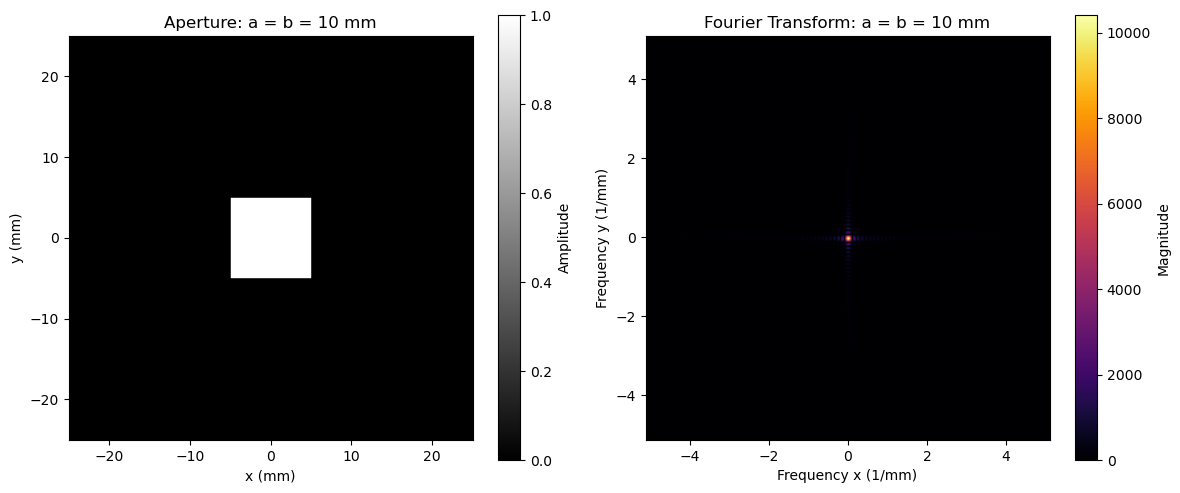

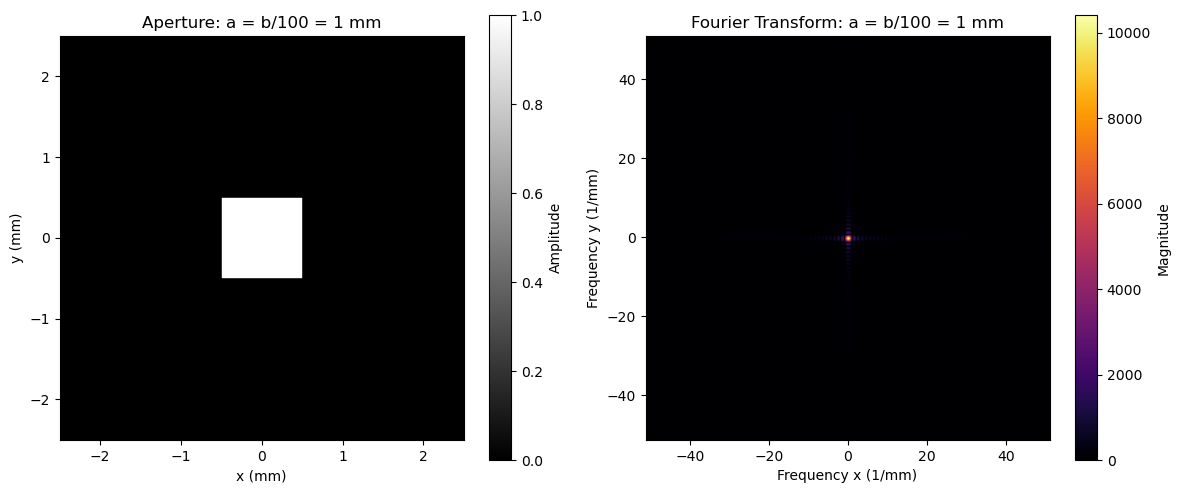

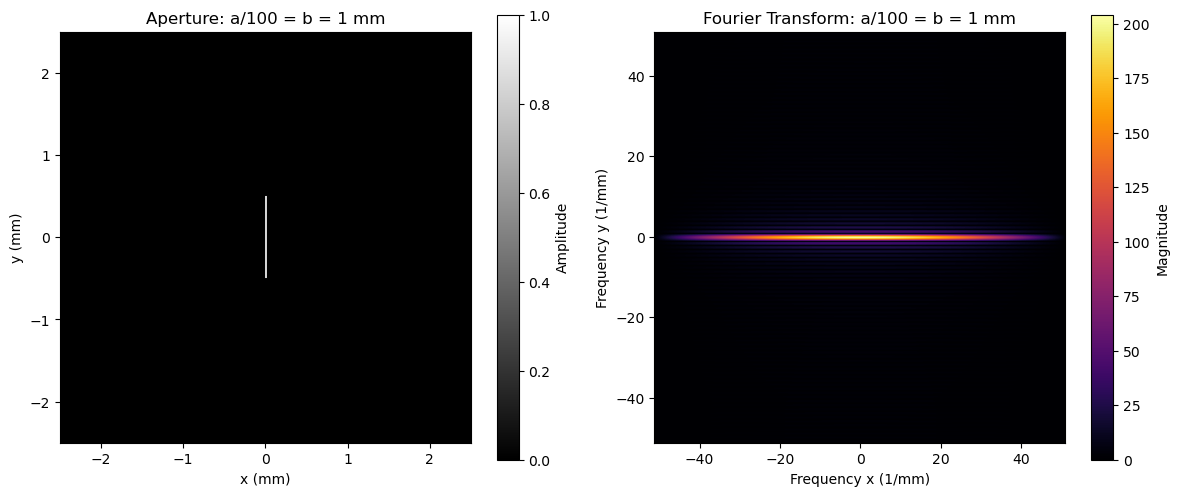

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def rect_aperture(x, y, a, b):
    return np.where((np.abs(x) <= a / 2) & (np.abs(y) <= b / 2), 1, 0)

def plot_aperture_and_ft(a, b, title):
    # Define grid
    N = 512
    L = max(a, b) * 5
    x = np.linspace(-L / 2, L / 2, N)
    y = np.linspace(-L / 2, L / 2, N)
    X, Y = np.meshgrid(x, y)

    # Aperture function
    aperture = rect_aperture(X, Y, a, b)

    # Compute 2D Fourier Transform
    ft = np.fft.fftshift(np.fft.fft2(aperture))
    ft_magnitude = np.abs(ft)

    # Create frequency grid
    freq_x = np.fft.fftshift(np.fft.fftfreq(N, L / N))
    freq_y = np.fft.fftshift(np.fft.fftfreq(N, L / N))

    # Plot aperture
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(aperture, extent=[-L / 2, L / 2, -L / 2, L / 2], cmap='gray')
    plt.colorbar(label="Amplitude")
    plt.title(f'Aperture: {title}')
    plt.xlabel('x (mm)')
    plt.ylabel('y (mm)')

    # Plot Fourier transform magnitude
    plt.subplot(1, 2, 2)
    plt.imshow(ft_magnitude, extent=[freq_x[0], freq_x[-1], freq_y[0], freq_y[-1]], cmap='inferno')
    plt.colorbar(label="Magnitude")
    plt.title(f'Fourier Transform: {title}')
    plt.xlabel('Frequency x (1/mm)')
    plt.ylabel('Frequency y (1/mm)')

    plt.tight_layout()
    plt.show()

# Case (a): a = b = 10 mm
plot_aperture_and_ft(10, 10, 'a = b = 10 mm')

# Case (b): a = b/100 = 1 mm
plot_aperture_and_ft(1, 1, 'a = b/100 = 1 mm')

# Case (c): a/100 = b = 1 mm
plot_aperture_and_ft(0.01, 1, 'a/100 = b = 1 mm')


#### 4

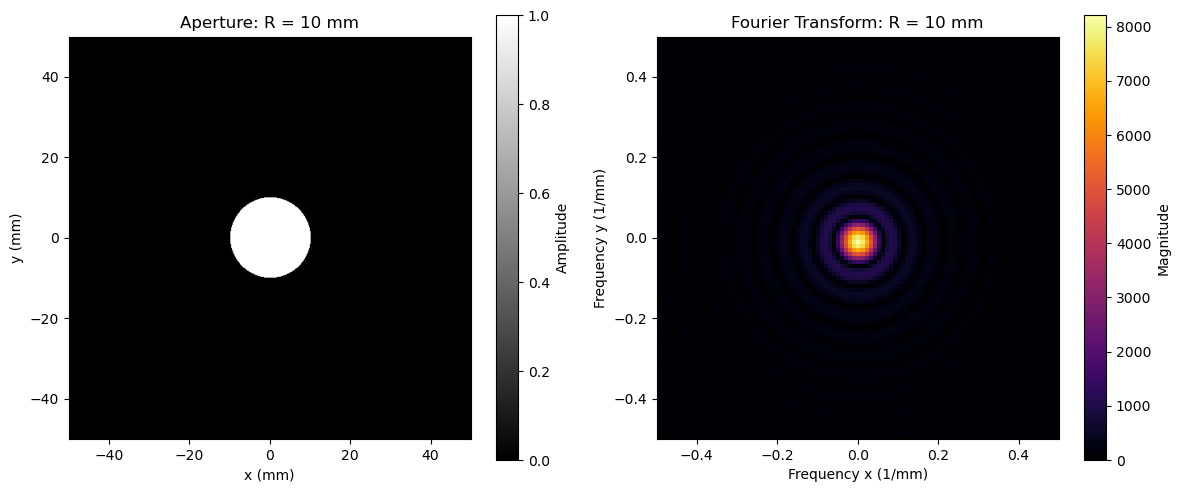

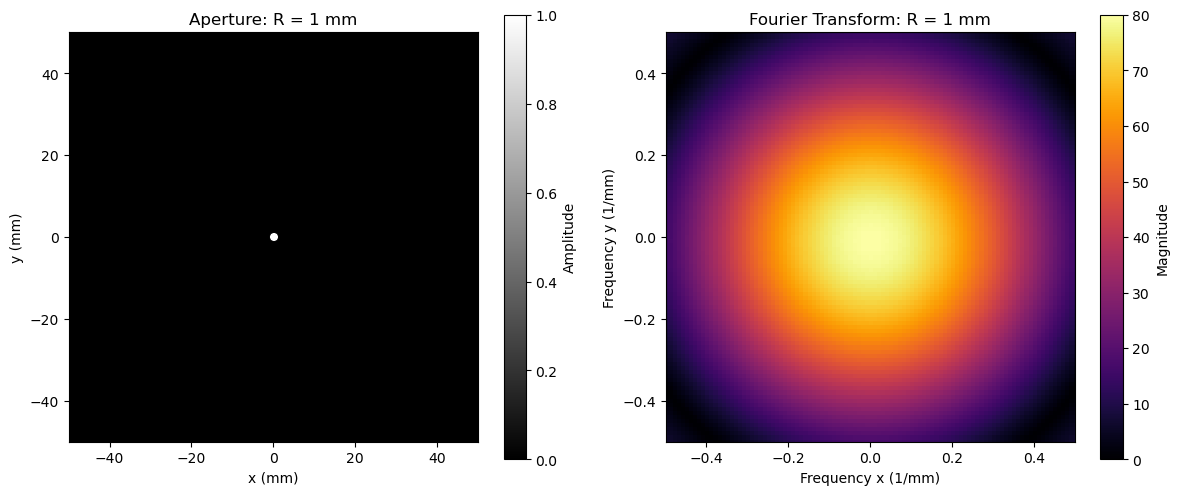

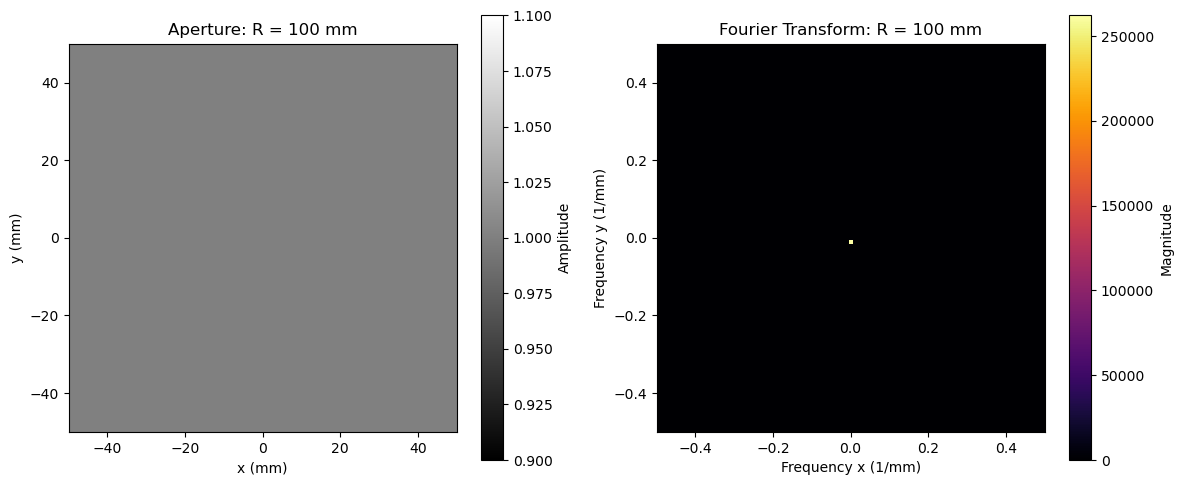

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def circ_aperture(x, y, R):
    """Define a circular aperture of radius R centered at the origin."""
    r = np.sqrt(x**2 + y**2)
    return np.where(r <= R, 1, 0)

def plot_circular_aperture_and_ft(R, title, L, freq_range):
    # Define grid
    N = 512
    x = np.linspace(-L / 2, L / 2, N)
    y = np.linspace(-L / 2, L / 2, N)
    X, Y = np.meshgrid(x, y)

    # Circular aperture
    aperture = circ_aperture(X, Y, R)

    # Compute 2D Fourier Transform
    ft = np.fft.fftshift(np.fft.fft2(aperture))
    ft_magnitude = np.abs(ft)

    # Create frequency grid
    freq_x = np.fft.fftshift(np.fft.fftfreq(N, L / N))
    freq_y = np.fft.fftshift(np.fft.fftfreq(N, L / N))

    # Plot circular aperture
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(aperture, extent=[-L / 2, L / 2, -L / 2, L / 2], cmap='gray')
    plt.colorbar(label="Amplitude")
    plt.title(f'Aperture: {title}')
    plt.xlabel('x (mm)')
    plt.ylabel('y (mm)')
    plt.xlim([-L / 2, L / 2])
    plt.ylim([-L / 2, L / 2])

    # Plot Fourier transform magnitude
    plt.subplot(1, 2, 2)
    plt.imshow(ft_magnitude, extent=[freq_x[0], freq_x[-1], freq_y[0], freq_y[-1]], cmap='inferno')
    plt.colorbar(label="Magnitude")
    plt.title(f'Fourier Transform: {title}')
    plt.xlabel('Frequency x (1/mm)')
    plt.ylabel('Frequency y (1/mm)')
    plt.xlim([-freq_range, freq_range])
    plt.ylim([-freq_range, freq_range])

    plt.tight_layout()
    plt.show()

# Set a consistent spatial scale and frequency range
L = 100  # mm (consistent physical size for aperture)
freq_range = 0.5  # 1/mm (consistent frequency range for FT)

# Case (a): R = 10 mm
plot_circular_aperture_and_ft(10, 'R = 10 mm', L, freq_range)

# Case (b): R = 1 mm
plot_circular_aperture_and_ft(1, 'R = 1 mm', L, freq_range)

# Case (c): R = 100 mm
plot_circular_aperture_and_ft(100, 'R = 100 mm', L, freq_range)


5

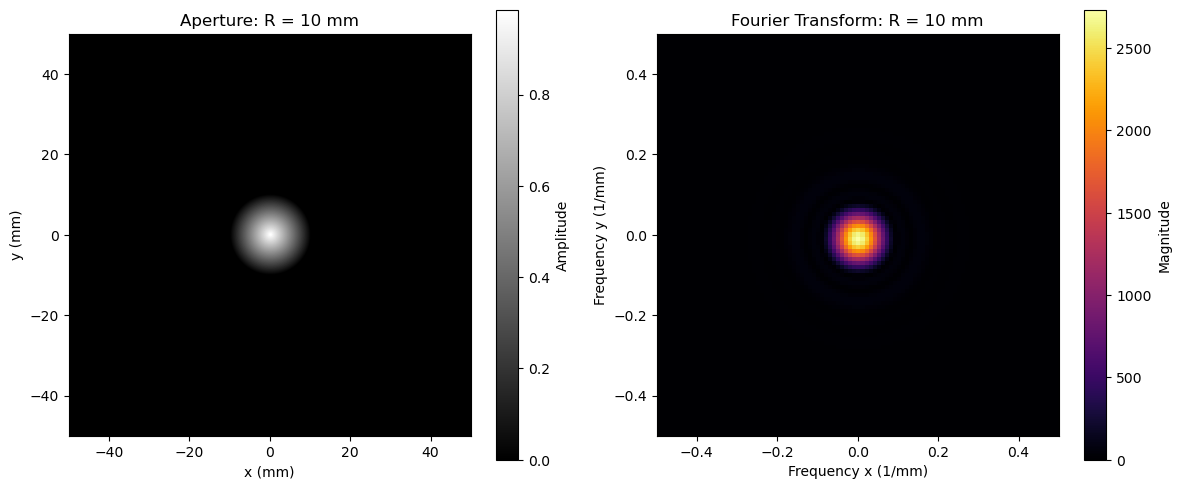

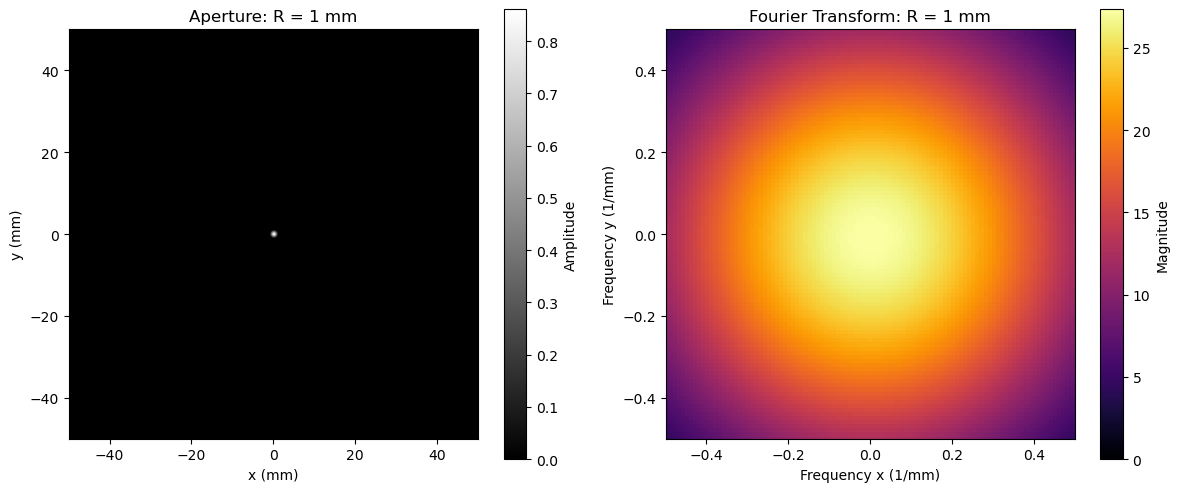

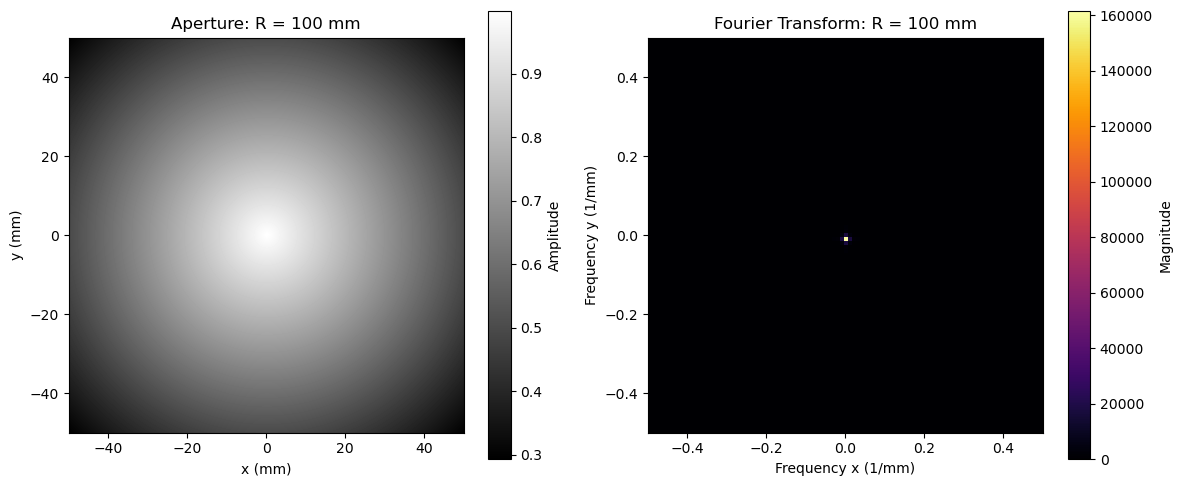

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def circ_aperture(x, y, R):
    """Define a circular aperture with linearly decreasing height."""
    r = np.sqrt(x**2 + y**2)
    aperture = np.where(r <= R, 1 - r / R, 0)
    return aperture

def plot_circular_aperture_and_ft(R, title, L, freq_range):
    # Define grid
    N = 512
    x = np.linspace(-L / 2, L / 2, N)
    y = np.linspace(-L / 2, L / 2, N)
    X, Y = np.meshgrid(x, y)

    # Circular aperture with linearly decreasing height
    aperture = circ_aperture(X, Y, R)

    # Compute 2D Fourier Transform
    ft = np.fft.fftshift(np.fft.fft2(aperture))
    ft_magnitude = np.abs(ft)

    # Create frequency grid
    freq_x = np.fft.fftshift(np.fft.fftfreq(N, L / N))
    freq_y = np.fft.fftshift(np.fft.fftfreq(N, L / N))

    # Plot circular aperture
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(aperture, extent=[-L / 2, L / 2, -L / 2, L / 2], cmap='gray')
    plt.colorbar(label="Amplitude")
    plt.title(f'Aperture: {title}')
    plt.xlabel('x (mm)')
    plt.ylabel('y (mm)')
    plt.xlim([-L / 2, L / 2])
    plt.ylim([-L / 2, L / 2])

    # Plot Fourier transform magnitude
    plt.subplot(1, 2, 2)
    plt.imshow(ft_magnitude, extent=[freq_x[0], freq_x[-1], freq_y[0], freq_y[-1]], cmap='inferno')
    plt.colorbar(label="Magnitude")
    plt.title(f'Fourier Transform: {title}')
    plt.xlabel('Frequency x (1/mm)')
    plt.ylabel('Frequency y (1/mm)')
    plt.xlim([-freq_range, freq_range])
    plt.ylim([-freq_range, freq_range])

    plt.tight_layout()
    plt.show()

# Set a consistent spatial scale and frequency range
L = 100  # mm (consistent physical size for aperture)
freq_range = 0.5  # 1/mm (consistent frequency range for FT)

# Case (a): R = 10 mm
plot_circular_aperture_and_ft(10, 'R = 10 mm', L, freq_range)

# Case (b): R = 1 mm
plot_circular_aperture_and_ft(1, 'R = 1 mm', L, freq_range)

# Case (c): R = 100 mm
plot_circular_aperture_and_ft(100, 'R = 100 mm', L, freq_range)


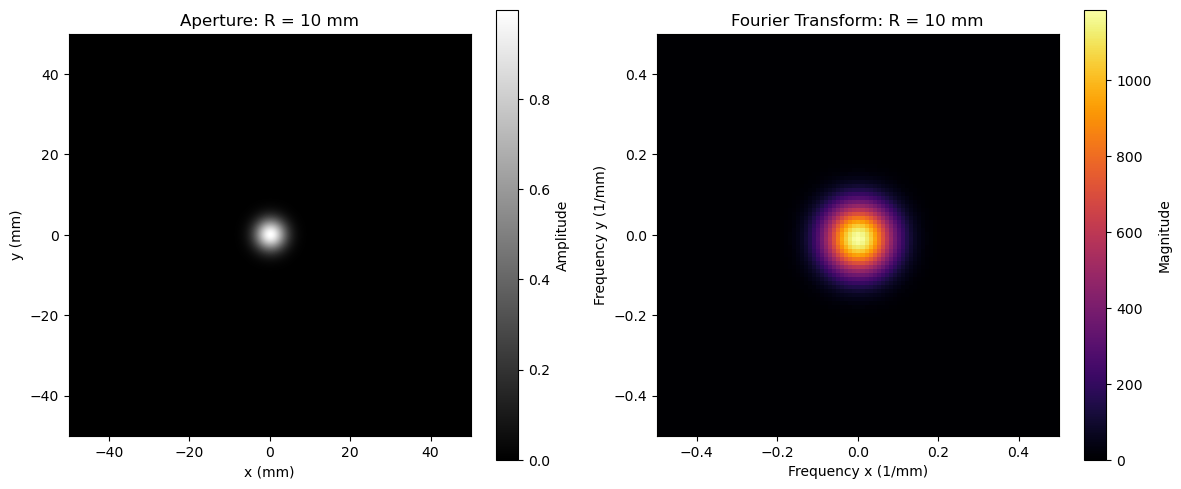

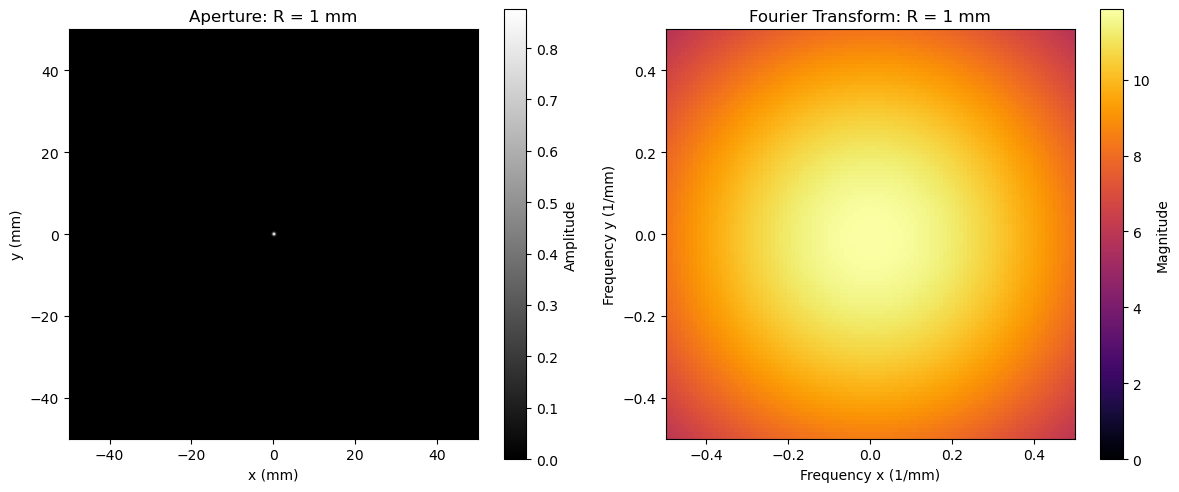

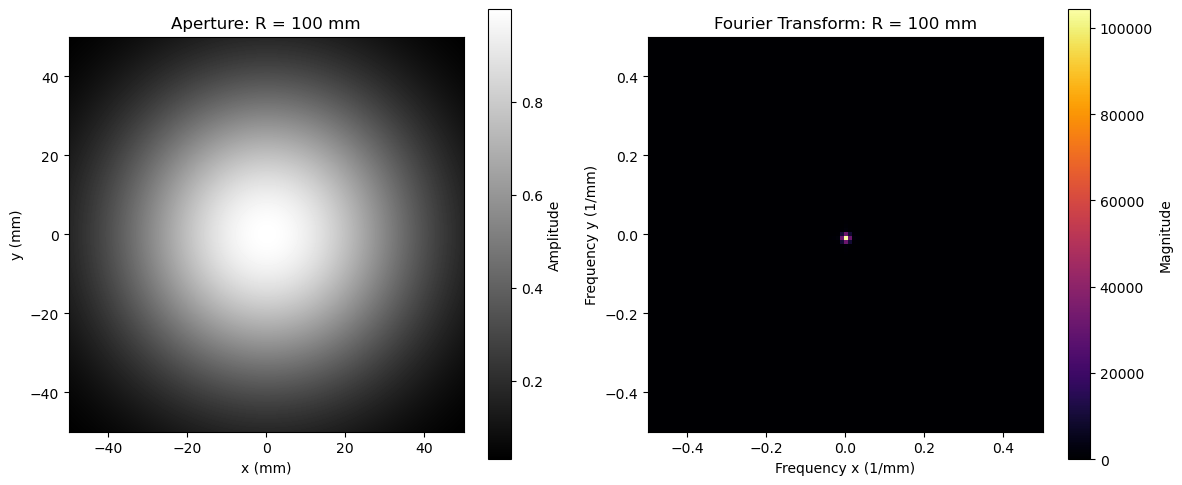

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def circ_aperture(x, y, R):
    """Define a circular aperture with a Gaussian profile."""
    r = np.sqrt(x**2 + y**2)
    alpha = -np.log(0.001) / R**2  # Set alpha to satisfy circ(R) = 0.001
    aperture = np.where(r <= R, np.exp(-alpha * r**2), 0)
    return aperture

def plot_circular_aperture_and_ft(R, title, L, freq_range):
    # Define grid
    N = 512
    x = np.linspace(-L / 2, L / 2, N)
    y = np.linspace(-L / 2, L / 2, N)
    X, Y = np.meshgrid(x, y)

    # Circular aperture with Gaussian profile
    aperture = circ_aperture(X, Y, R)

    # Compute 2D Fourier Transform
    ft = np.fft.fftshift(np.fft.fft2(aperture))
    ft_magnitude = np.abs(ft)

    # Create frequency grid
    freq_x = np.fft.fftshift(np.fft.fftfreq(N, L / N))
    freq_y = np.fft.fftshift(np.fft.fftfreq(N, L / N))

    # Plot circular aperture
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(aperture, extent=[-L / 2, L / 2, -L / 2, L / 2], cmap='gray')
    plt.colorbar(label="Amplitude")
    plt.title(f'Aperture: {title}')
    plt.xlabel('x (mm)')
    plt.ylabel('y (mm)')
    plt.xlim([-L / 2, L / 2])
    plt.ylim([-L / 2, L / 2])

    # Plot Fourier transform magnitude
    plt.subplot(1, 2, 2)
    plt.imshow(ft_magnitude, extent=[freq_x[0], freq_x[-1], freq_y[0], freq_y[-1]], cmap='inferno')
    plt.colorbar(label="Magnitude")
    plt.title(f'Fourier Transform: {title}')
    plt.xlabel('Frequency x (1/mm)')
    plt.ylabel('Frequency y (1/mm)')
    plt.xlim([-freq_range, freq_range])
    plt.ylim([-freq_range, freq_range])

    plt.tight_layout()
    plt.show()

# Set a consistent spatial scale and frequency range
L = 100  # mm (consistent physical size for aperture)
freq_range = 0.5  # 1/mm (consistent frequency range for FT)

# Case (a): R = 10 mm
plot_circular_aperture_and_ft(10, 'R = 10 mm', L, freq_range)

# Case (b): R = 1 mm
plot_circular_aperture_and_ft(1, 'R = 1 mm', L, freq_range)

# Case (c): R = 100 mm
plot_circular_aperture_and_ft(100, 'R = 100 mm', L, freq_range)
